In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [ ]:
# Give a unique student ID (e.g. roll number)
student_id = 247616

# Use it as a seed to make subset random but repeatable
np.random.seed(student_id)


In [ ]:
# Create a personalized 80% subset of the data
X_sub, _, y_sub, _ = train_test_split(X, y, train_size=0.8, stratify=y, random_state=student_id)

In [ ]:
# Convert to a DataFrame for easier viewing and saving
df = pd.DataFrame(X_sub, columns=feature_names)
df['target'] = y_sub

# Show first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.3,2.5,5.0,1.9,2
1,4.6,3.2,1.4,0.2,0
2,6.4,2.7,5.3,1.9,2
3,5.6,2.8,4.9,2.0,2
4,6.0,2.9,4.5,1.5,1


In [ ]:
df.to_csv(f"iris_subset_student_{student_id}.csv", index=False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y_sub.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=student_id
)


In [ ]:
def create_model(output_units, loss_fn, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(output_units, activation='softmax')
    ])

    model.compile(
        loss=loss_fn,
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model


In [ ]:
# Train with Categorical Crossentropy
model_ce = create_model(output_units=3, loss_fn='categorical_crossentropy')

history_ce = model_ce.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    verbose=1  # set to 1 if you want live output
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.3190 - loss: 1.0266 - val_accuracy: 0.2500 - val_loss: 1.0946
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3060 - loss: 1.0039 - val_accuracy: 0.2500 - val_loss: 1.0748
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3477 - loss: 1.0088 - val_accuracy: 0.2500 - val_loss: 1.0557
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4427 - loss: 0.9812 - val_accuracy: 0.2917 - val_loss: 1.0368
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5625 - loss: 0.9600 - val_accuracy: 0.3333 - val_loss: 1.0198
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5299 - loss: 0.9504 - val_accuracy: 0.3750 - val_loss: 1.0025
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5312 - loss: 0.9314 - val_accuracy: 0.3750 - val_loss: 0.9857
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5703 - loss: 0.9174 - val_accuracy: 0.3750 - val_loss: 0.9692

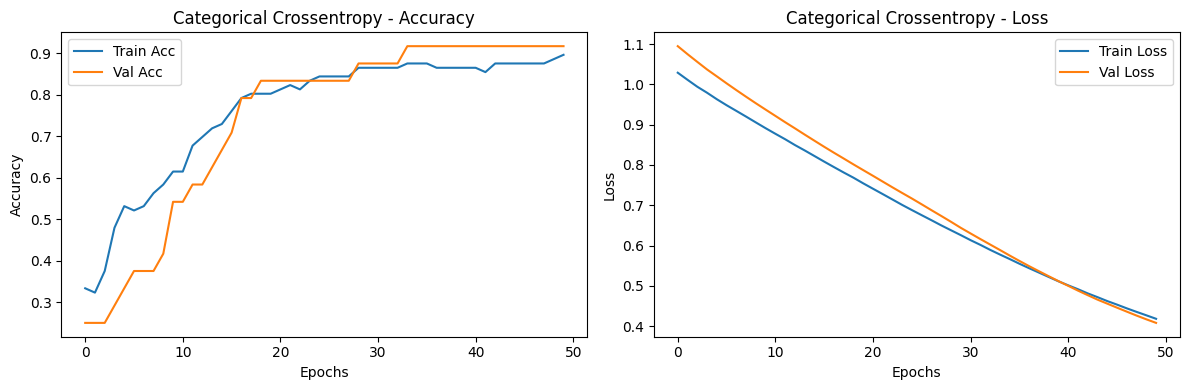

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_ce, "Categorical Crossentropy")


In [ ]:
#Model Creation for Binary Cross Entropy
def create_model_bce(output_units, loss_fn='binary_crossentropy', optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(output_units, activation='sigmoid')  # sigmoid for BCE
    ])

    model.compile(
        loss=loss_fn,
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model


In [ ]:
model_bce = create_model_bce(output_units=3)

history_bce = model_bce.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    verbose=1
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.3073 - loss: 0.7022 - val_accuracy: 0.3333 - val_loss: 0.6866
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3763 - loss: 0.6936 - val_accuracy: 0.3333 - val_loss: 0.6810
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3841 - loss: 0.6894 - val_accuracy: 0.3333 - val_loss: 0.6756
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4154 - loss: 0.6814 - val_accuracy: 0.3333 - val_loss: 0.6703
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4427 - loss: 0.6688 - val_accuracy: 0.3750 - val_loss: 0.6651
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4388 - loss: 0.6695 - val_accuracy: 0.3750 - val_loss: 0.6600
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5299 - loss: 0.6608 - val_accuracy: 0.3750 - val_loss: 0.6548
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5443 - loss: 0.6551 - val_accuracy: 0.4167 - val_loss: 0.6498

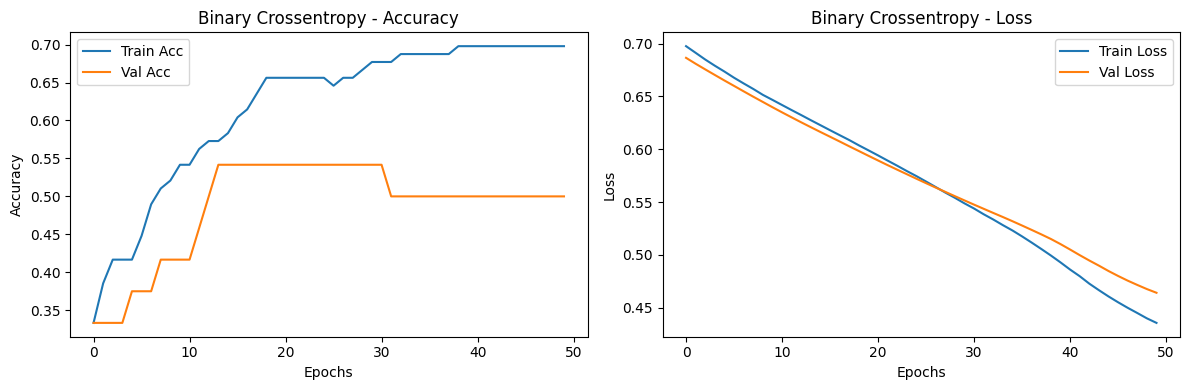

In [ ]:
plot_history(history_bce, "Binary Crossentropy")


In [ ]:
#Model for MSE
def create_model_mse(output_units, loss_fn='mse', optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(output_units, activation='softmax')  # softmax is okay with MSE
    ])

    model.compile(
        loss=loss_fn,
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model


In [ ]:
model_mse = create_model_mse(output_units=3)

history_mse = model_mse.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    verbose=1
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3047 - loss: 0.2292 - val_accuracy: 0.4583 - val_loss: 0.2051
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2578 - loss: 0.2255 - val_accuracy: 0.4167 - val_loss: 0.1993
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3281 - loss: 0.2099 - val_accuracy: 0.4583 - val_loss: 0.1932
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3255 - loss: 0.2072 - val_accuracy: 0.5833 - val_loss: 0.1872
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3568 - loss: 0.1990 - val_accuracy: 0.6667 - val_loss: 0.1811
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4219 - loss: 0.1940 - val_accuracy: 0.7083 - val_loss: 0.1751
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5742 - loss: 0.1891 - val_accuracy: 0.7500 - val_loss: 0.1693
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6393 - loss: 0.1818 - val_accuracy: 0.7500 - val_loss: 0.1636

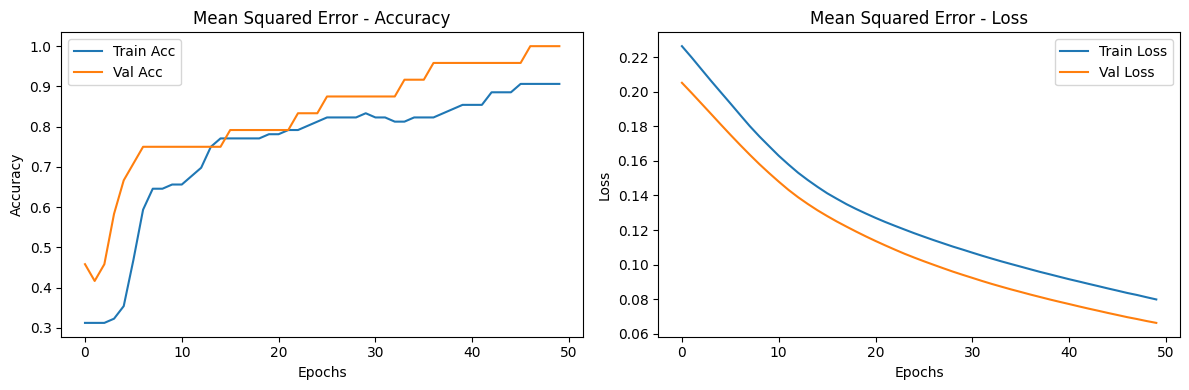

In [ ]:
plot_history(history_mse, "Mean Squared Error")


In [ ]:
def extract_final_metrics(history):
    acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    return round(acc, 4), round(val_acc, 4), round(loss, 4), round(val_loss, 4)

acc_ce, val_acc_ce, loss_ce, val_loss_ce = extract_final_metrics(history_ce)
acc_bce, val_acc_bce, loss_bce, val_loss_bce = extract_final_metrics(history_bce)
acc_mse, val_acc_mse, loss_mse, val_loss_mse = extract_final_metrics(history_mse)


In [ ]:
results_df = pd.DataFrame({
    "Loss Function": ["Categorical Crossentropy", "Binary Crossentropy", "Mean Squared Error"],
    "Train Accuracy": [acc_ce, acc_bce, acc_mse],
    "Val Accuracy": [val_acc_ce, val_acc_bce, val_acc_mse],
    "Train Loss": [loss_ce, loss_bce, loss_mse],
    "Val Loss": [val_loss_ce, val_loss_bce, val_loss_mse]
})

results_df


,Loss Function,Train Accuracy,Val Accuracy,Train Loss,Val Loss
0,Categorical Crossentropy,0.8958,0.9167,0.4185,0.4084
1,Binary Crossentropy,0.6979,0.5000,0.4356,0.4641
2,Mean Squared Error,0.9062,1.0000,0.0799,0.0663


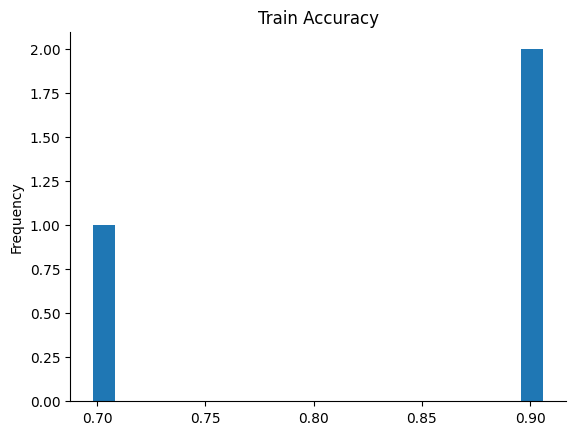

In [ ]:
# @title Train Accuracy

from matplotlib import pyplot as plt
results_df['Train Accuracy'].plot(kind='hist', bins=20, title='Train Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
results_df["Convergence Stability"] = [
    "Very Stable, fast convergence",       # Categorical CE usually converges smoothly
    "Slightly unstable, decent accuracy",  # BCE can fluctuate since not ideal for multi-class
    "Stable but slower convergence"        # MSE generally converges slower for classification
]

results_df


,Loss Function,Train Accuracy,Val Accuracy,Train Loss,Val Loss,Convergence Stability
0,Categorical Crossentropy,0.8958,0.9167,0.4185,0.4084,"Very Stable, fast convergence"
1,Binary Crossentropy,0.6979,0.5000,0.4356,0.4641,"Slightly unstable, decent accuracy"
2,Mean Squared Error,0.9062,1.0000,0.0799,0.0663,Stable but slower convergence


In [ ]:
#Optimizers
def create_model_with_optimizer(optimizer):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model


In [ ]:
#SGD
model_sgd = create_model_with_optimizer(keras.optimizers.SGD())
history_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)



Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.4128 - loss: 1.0061 - val_accuracy: 0.3750 - val_loss: 0.9981
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3503 - loss: 1.0204 - val_accuracy: 0.3750 - val_loss: 0.9841
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4102 - loss: 0.9801 - val_accuracy: 0.3750 - val_loss: 0.9710
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4062 - loss: 0.9763 - val_accuracy: 0.3750 - val_loss: 0.9586
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4036 - loss: 0.9618 - val_accuracy: 0.3750 - val_loss: 0.9469
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4388 - loss: 0.9320 - val_accuracy: 0.4167 - val_loss: 0.9357
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4115 - loss: 0.9304 - val_accuracy: 0.4167 - val_loss: 0.9250
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4440 - loss: 0.9240 - val_accuracy: 0.4583 - val_loss: 0.9148

In [ ]:
#Adam
model_adam = create_model_with_optimizer(keras.optimizers.Adam())
history_adam = model_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.2695 - loss: 1.2595 - val_accuracy: 0.1667 - val_loss: 1.3982
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3789 - loss: 1.2666 - val_accuracy: 0.2083 - val_loss: 1.3571
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4102 - loss: 1.2187 - val_accuracy: 0.2500 - val_loss: 1.3172
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4141 - loss: 1.2045 - val_accuracy: 0.2917 - val_loss: 1.2781
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4297 - loss: 1.1863 - val_accuracy: 0.2917 - val_loss: 1.2413
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 1.1112 - val_accuracy: 0.2917 - val_loss: 1.2086
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4453 - loss: 1.1228 - val_accuracy: 0.2917 - val_loss: 1.1780
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5104 - loss: 1.0641 - val_accuracy: 0.2917 - val_loss: 1.1493

In [ ]:
#RMSProp
model_rms = create_model_with_optimizer(keras.optimizers.RMSprop())
history_rms = model_rms.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.2161 - loss: 1.2286 - val_accuracy: 0.4167 - val_loss: 1.1305
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2279 - loss: 1.2206 - val_accuracy: 0.4167 - val_loss: 1.1124
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2630 - loss: 1.1884 - val_accuracy: 0.4167 - val_loss: 1.0977
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2487 - loss: 1.1885 - val_accuracy: 0.4167 - val_loss: 1.0844
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2799 - loss: 1.1506 - val_accuracy: 0.4167 - val_loss: 1.0720
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2656 - loss: 1.1273 - val_accuracy: 0.4167 - val_loss: 1.0606
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2943 - loss: 1.1207 - val_accuracy: 0.4583 - val_loss: 1.0489
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3451 - loss: 1.1087 - val_accuracy: 0.4583 - val_loss: 1.0377

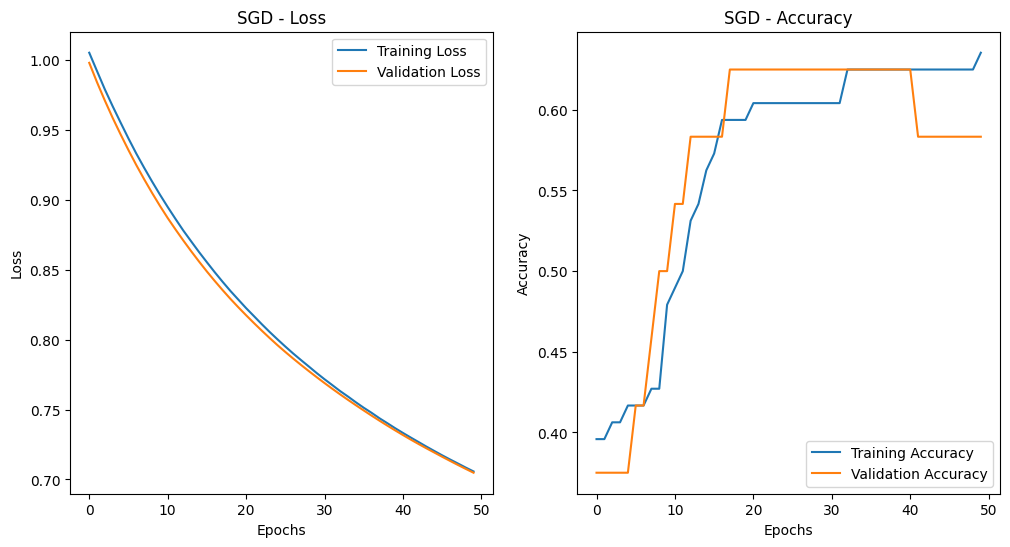

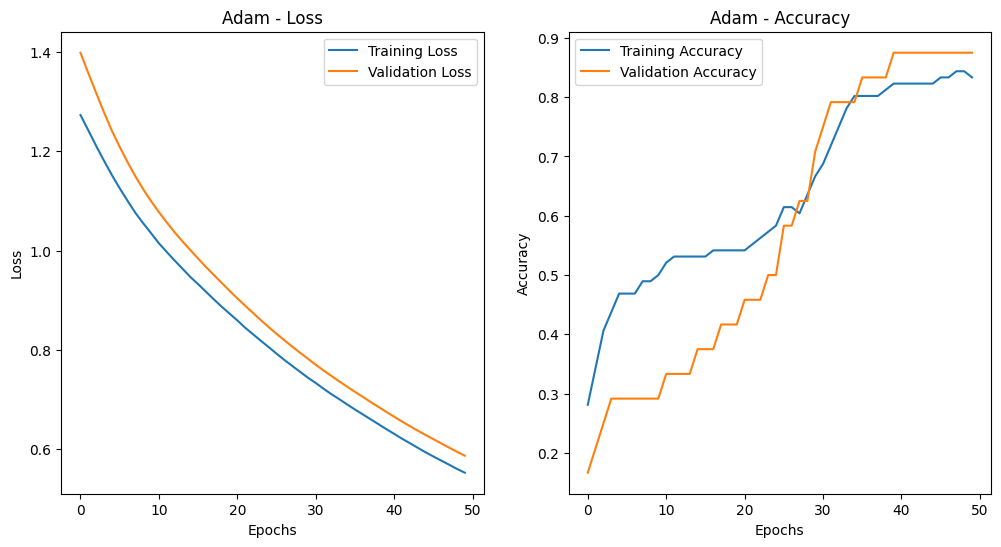

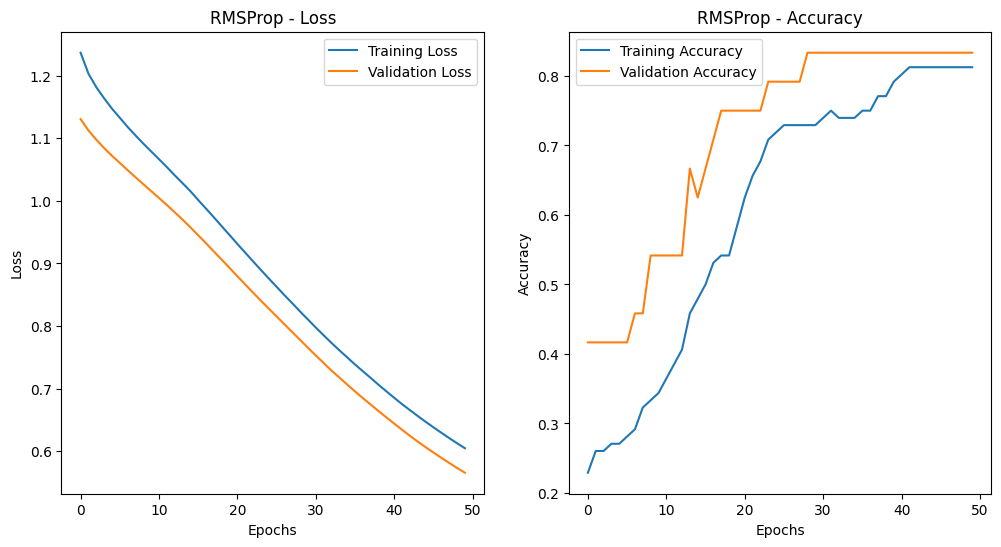

In [ ]:
def plot_history(history, optimizer_name):
    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{optimizer_name} - Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{optimizer_name} - Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot for each optimizer
plot_history(history_sgd, "SGD")
plot_history(history_adam, "Adam")
plot_history(history_rms, "RMSProp")


In [ ]:
def extract_final_metrics(history):
    acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    return round(acc, 4), round(val_acc, 4), round(loss, 4), round(val_loss, 4)

# Extract metrics for each optimizer
acc_sgd, val_acc_sgd, loss_sgd, val_loss_sgd = extract_final_metrics(history_sgd)
acc_adam, val_acc_adam, loss_adam, val_loss_adam = extract_final_metrics(history_adam)
acc_rms, val_acc_rms, loss_rms, val_loss_rms = extract_final_metrics(history_rms)

# Summarize the results in a table
optimizer_df = pd.DataFrame({
    "Optimizer": ["SGD", "Adam", "RMSprop"],
    "Train Accuracy": [acc_sgd, acc_adam, acc_rms],
    "Val Accuracy": [val_acc_sgd, val_acc_adam, val_acc_rms],
    "Train Loss": [loss_sgd, loss_adam, loss_rms],
    "Val Loss": [val_loss_sgd, val_loss_adam, val_loss_rms]
})

optimizer_df


,Optimizer,Train Accuracy,Val Accuracy,Train Loss,Val Loss
0,SGD,0.6354,0.5833,0.7057,0.7048
1,Adam,0.8333,0.8750,0.5526,0.5869
2,RMSprop,0.8125,0.8333,0.6050,0.5659


In [ ]:
optimizer_df["Convergence Stability"] = [
    "Slow but stable",             # SGD
    "Fast and stable",             # Adam
    "Fast, slight fluctuation"     # RMSProp
]

optimizer_df


,Optimizer,Train Accuracy,Val Accuracy,Train Loss,Val Loss,Convergence Stability
0,SGD,0.6354,0.5833,0.7057,0.7048,Slow but stable
1,Adam,0.8333,0.8750,0.5526,0.5869,Fast and stable
2,RMSprop,0.8125,0.8333,0.6050,0.5659,"Fast, slight fluctuation"
